# Métodos Clásicos de Optimización para Problemas No-Lineales sin Restricciones

Se quiere resolver el problema siguiente:

Dada una función escalar $f(\mathbf{x}): R^n\rightarrow R$, 2 veces diferenciable y continua, encontrar $x \in R^n$, solución de: $min_{\mathbf{x} \in R^n} f(\mathbf{x}).$

Encontrar una solución de este problema corresponde a encontrar un punto $\mathbf{x}$ que satisface:$f(\mathbf{x}*)≤f(\mathbf{x})∀\mathbf{x} \in R^n$
Este punto $\mathbf{x}$ se denomina mínimo global de $f$ sobre $R^n$. 


Un punto $\mathbf{x}$ es un mínimo local de $f$ en $R^n$ si existe $r>0$ tal que: $f(\mathbf{x}*)≤f(\mathbf{x})$ para $||\mathbf{x}−\mathbf{x}*||≤r$. El mínimo global de $f$ será el mínimo local de menor valor de la función objetivo.

Desde un punto de vista teórico, las condiciones más generales para que $\mathbf{x}$ sea mínimolocal de $f$ son las siguientes:

**Teorema**: Un punto $\mathbf{x}$ es mínimo local de $f$ si se verifican las siguientes condiciones:

1. $\mathbf{x}*$ es un punto estacionario de $f$
$$\nabla f(\mathbf{x}*)=\left[\frac{\partial f(\mathbf{x}*)}{\partial x_1}, \frac{\partial f(\mathbf{x}*)}{\partial x_2}, \ldots \frac{\partial f(\mathbf{x}*)}{\partial x_n} \right]=[0, 0,...,0]= \mathbf{0}$$



2. La matriz hessiana $∇^2f(x)$ de $f$ en $\mathbf{x}$ es definida positiva

\begin{equation}∇^2f(x)=
\begin{bmatrix}
\frac{\partial f(\mathbf{x}*)}{\partial x_1^2} & \cdots & \frac{\partial f(\mathbf{x}*)}{\partial x_1\partial x_n} \\
\vdots & \vdots & \vdots\\
\frac{\partial f(\mathbf{x}*)}{\partial x_n\partial x_1} & \cdots & \frac{\partial f(\mathbf{x}*)}{\partial x_n^2}
\end{bmatrix}
\end{equation} 

Entonces, para obtener el mínimo local se debe resolver un sistema de ecuaciones nolineales, en general complejo. 

Surge de esta forma la necesidad de aplicar métodos numéricos.

Consideraremos métodos numéricos llamados de descenso, que pueden ser clasificadosen 3 grupos:

$$\text{Métodos de Descenso} \left \{ \begin{matrix} \text{Primer Orden} &\left \{ \begin{matrix}\text{Método del Gradiente y Variedades,}\\\text{Método del Gradiente Conjugado}\end{matrix}\right. 
\\\\
\text{Segundo Orden}&\left \{ \begin{matrix}\text{Métodos de Newton,}\\\text{Variedades}\end{matrix}\right.\\\\
Cuasi-Newton & \left\{ \begin{matrix}\text{DFP: Davidon - Fletcher}\\\text{BFGS}\end{matrix}\right.
\end{matrix}\right.  
$$


## Propiedades de los métodos
### Gradiente descendente
* En cada etapa $αk$, llamado el paso del método en la etapa $(k+1)-ésima$, debe verificar: $∇f(x_k+αd_k)·dk=0$ que en general será una ecuación difícil de resolver exactamente en $α$. Por esta razón se utilizan pasos $α_k$ que serán aproximaciones del paso exacto, determinados por algún método de elección de paso.
* La rapidez de convergencia del método es lineal: 
Si $x_k$ es la sucesión de puntos determinados por el método del gradiente, se tiene que $∃λ∈(0,1)$ tal que:
̄$$|x_{k+1}−x|≤λ|x_k−x|$$ donde $x$ es un punto estacionario de $f:∇f(x)=0$. Este punto estacionario depende el punto inicial utilizado.
* Dos direcciones consecutivas generadas por el método del gradiente son ortogonales.
* Por tener velocidad lineal, la convergencia del método del gradiente es lenta, aún en el caso de funciones cuadráticas.

### Gradiente conjugado
* Sea (PC) el problema de optimización cuadrático definido por: 
$$min_{\mathbf{x}\in R^n} q(x)=12\mathbf{x}^TQ\mathbf{x}−b^T\mathbf{x},$$ donde $Q$ es una matriz definida positiva
* Las direcciones de búsqueda son conjugadas, i.e., son Q-ortogonales entre si, el método del gradiente conjugado converje en a lo más $n$ iteraciones.

### Método de Newton
* El método de Newton en cada iteración, considera una aproximación cuadrática de la función objetivo, y define el nuevo punto de la sucesión minimizante como el óptimo de la aproximación cuadrática de la función objetivo.
$$x_{k+1}=x_k−t_k|∇^2f(x_k)|^{−1}∇f(x_k),$$
* El punto inicial $x_0$ no puede ser arbitrario, ya que para que el método converja, la dirección $t_k$ debe ser de descenso **converjencia local**
* Su rapidez de convergencia es de velocidad cuadrática
$$|x_{k+1}−x|≤λ|x_k−x|^2.$$

### Métodos Cuasi-Newton
En cada iteración del método de Newton es necesario calcular la inversa de la matriz hessiana de $f$ en$x_k$ de manera exacta, lo que es costoso computacionalmente, $O(n^3)$ operaciones aritméticas. 
Por esto razon, se propone un método iterativo de la forma:

$$x_{k+1}=x_k−t_k S_k∇f(x_k),$$

en donde $S_k$ es una matriz que aproxima a $∇^2f(x_k)^{−1}$ y $t_k≥0$ minimiza $f$ sobre $x_k−λ∇f(x_k)$ para $λ≥0$ (paso exacto o aproximado)

# Gradiente descendente

Dada una función $f(\mathbf{x}): R^n\rightarrow R$, diferenciable en $\mathbf{x}_0$, el gradiente de esa función $-\nabla f(\mathbf{x}_0)$ es la dirección de máximo descenso, en donde

$$\nabla f=\left[\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots \frac{\partial f}{\partial x_n} \right]$$

Se define una función:
$$ \phi (t) = f(\mathbf{x}_0+t\mathbf{u}),$$
con $\mathbf{u}$ un vector unitario, es decir $||\mathbf{u}|| = 1$, la derivada de $\phi$ se obtiene aplicando la regla de la cadena:
$$ \phi' (t) = \frac{\partial f}{\partial x_1}\frac{\partial x_1}{\partial t}+....+\frac{\partial f}{\partial x_n}\frac{\partial x_n}{\partial t}$$

$$=\frac{\partial f}{\partial x_1}u_1 +...+\frac{\partial f}{\partial x_n}u_n$$

$$=\nabla f(\mathbf{x}_0+t\mathbf{u})\cdot \mathbf{u}.$$

Para $t=0$,
$$\phi'(0)  =\nabla f(\mathbf{x}_0)\cdot \mathbf{u}=||\nabla f(\mathbf{x}_0)||cos\theta,$$

en donde $\theta$ es el ángulo entre $\nabla f(\mathbf{x}_0)$ y $\mathbf{u}$. Esta función tiene un mínimo cuando $\theta =\pi,$ de donde se obtiene que

$$\phi'(0)=-||\nabla f(\mathbf{x}_0)||=\nabla f(\mathbf{x}_0)\cdot \mathbf{u} \Rightarrow\qquad \mathbf{u} =-\frac{\nabla f(\mathbf{x}_0)}{||\nabla f(\mathbf{x}_0)||},$$

de donde se obtiene que la dirección del máximo descenso es $-\nabla f(\mathbf{x}_0).$

El problema de minimización de la función vectorial $f(\mathbf{x}_0+t\mathbf{u})$ se transforma en un problema de minimización de la función $\phi(t)$ dependiente de t. Es decir, se necesita encontrar un valor $t>0$ que minimiza

$$ \phi_0 (t) = f(\mathbf{x}_0+t\nabla f(\mathbf{x}_0)).$$

Una vez encontrado el mínimo $t_0$, se define

$$x_1=x_0-t_0\nabla f(\mathbf{x}_0),$$
y se repite el proceso para encontrar el mínimo de la función en la dirección $-\nabla f(\mathbf{x}_1)$, de ahí se obtine $x_2$ minimizando

$$ \phi_1 (t) = f(\mathbf{x}_1+t\nabla f(\mathbf{x}_1)),$$

y asi sucesivamente. 


El método del *gradiente descendente* se define como sigue:

Dada una solución inicial $x_0$, el método calcula una secuencia de iteraciones ${x_k}$, de la forma:

$$x_{k+1} = x_k -t_k\nabla f(\mathbf{x}_k), \quad k=0,1,2,...$$

en donde $t_k$ minimiza la función

$$ \phi_k (t) = f(\mathbf{x}_k+t\nabla f(\mathbf{x}_k)).$$



## Ejemplo
Encontrar el mínimo de la función

$$ f(x,y) = 4x^2 -4xy +2y^2$$ 

1. Se da un punto inicial $x_0 =(2,3)$


2. Se calcula el máximo descenso en ese punto $-\nabla f(\mathbf{x}_0)$
$$\nabla f(x,y) = (8x-4y,4y-4x)$$

$$-\nabla f(\mathbf{x}_0) = -\nabla f(2,3)=(16-12,12-8)=-(4,4)$$

3. Se calcula el mínimo $t_0$ de la función $\phi$ en ese punto
$$ \phi(t_0) = f(\mathbf{x}_0+t_0\nabla f(\mathbf{x}_0))=f((2,3)-t(4,4))=f(2-4t_0,3-4t_0)$$

$$ \phi'(t_0) =  -\nabla f((2,3)-t_0(4,4))\cdot(4,4)=64t_0-32$$

Se minimiza cuando $t_0=1/2$

4. Se define $$x_1=x_0-t_0\nabla f(\mathbf{x}_0)$$

$$x_1=x_0-\frac{1}{2}\nabla f(x_0)= (2,3)-\frac{1}{2}(4,4)=(0,1)$$

5. Se repite el proceso hasta que converja
$$x_2= (\frac{2}{5},\frac{3}{5})$$

$$x_3= (0,\frac{2}{10})$$
$$\vdots$$
$$x*=(0,0)$$

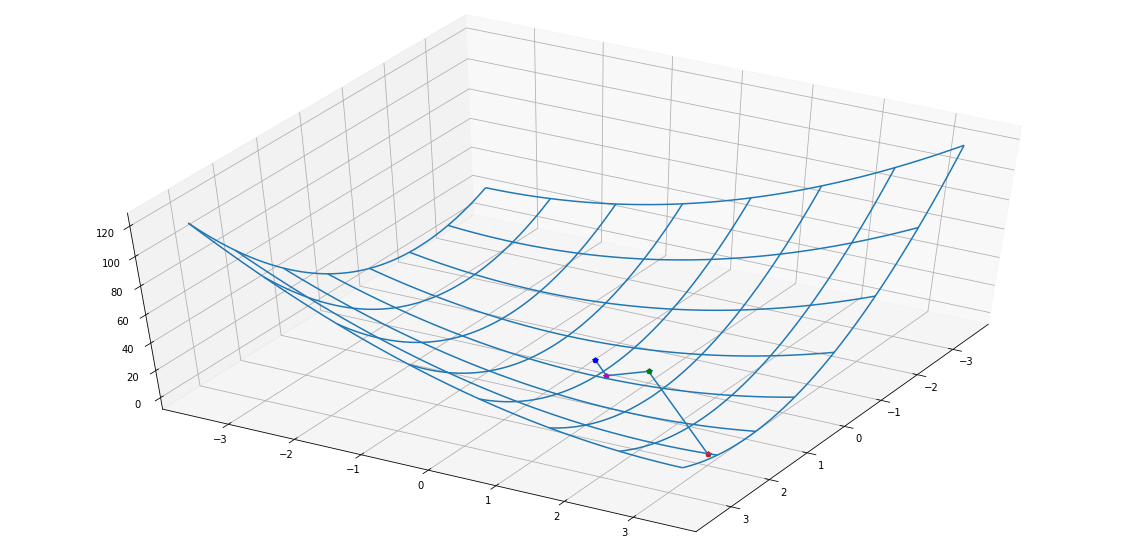

In [11]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
#if using a Jupyter notebook, include:
%matplotlib inline
#plt.rcParams['figure.dpi'] = 400

#plt.rcParams['figure.figsize'] = [30, 15]

x = np.arange(-3.5,3.5,0.1)
y = np.arange(-3.5,3.5,0.1)
X,Y = np.meshgrid(x,y)
Z = 4*X**2-4*X*Y +2*Y**2

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111, projection='3d')

ax1.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
x_p = [2,0,2/5,0]
y_p = [3,1,3/5,2/10]
plt.plot(x_p,y_p,'*-')
ax1.scatter(2,3,color='r')
ax1.scatter(0,1,color='g')
ax1.scatter(2/5,3/5,color='m')
ax1.scatter(0,2/10,color='b')
ax1.view_init(50, 30)
plt.show()
#ax1.set_title('row step size 10, column step size 10')
#fig = plt.figure(figsize=(100,100))
#ax = fig.add_subplot(111, projection='3d')



## Formas cuadraticas

Una *forma cuadrática* es una función $f(\mathbf{x}): R^n->R$ de la forma:
$$f(\mathbf{x}) =\frac{1}{2}\mathbf{x}^TA\mathbf{x}-\mathbf{b}^T\mathbf{x}+c,$$
con $A \in R^{nxn},$ $x,b \in R^{n},$ y c una constante.
Suponiendo que $A$ es simetrica positiva definida, el mínimo de f se encuentra derivando es funcion e igualando a cero, i.e. 

$\nabla f(\mathbf{x})=\frac{1}{2}\mathbf{x}^TA^T+\frac{1}{2}A\mathbf{x}-\mathbf{b}=0 $

Lo que implica que el valor que minimiza a $f$ es la solución de $A\mathbf{x} =\mathbf{b}$.

Método del gradiente descendente,
Dado un punto $x_0$, el descenso máximo de la función $f(\mathbf{x}_i)$ se encuentra en la dirección del gradiente en ese punto, es decir

$-\nabla f(\mathbf{x}_i)=\mathbf{b}-A\mathbf{x}_i $

Se define el residuo como:
$$\mathbf{r}_i=\mathbf{b}-A\mathbf{x}_i =-\nabla f(\mathbf{x}_i), $$
que indica que tan lejos se eicuentra $A\mathbf{x}_i$ de $\mathbf{b}$ y se encuentra en la dirección del descenso máximo.

Si $\mathbf{x}$ es la solución del sistema $A\mathbf{x}=\mathbf{b}$, se define el error como 
$$\mathbf{e}_i =\mathbf{x}_i -\mathbf{x},$$ 
el residuo esta relacionado con el error como sigue:
$$\mathbf{r}_i =-A\mathbf{e}_i.$$

Iniciando de $x_0$, es necesario encontrar un valor t, tal que $f$ sea mínima para
$$\mathbf{x}_1=\mathbf{x}_0-t\nabla f(\mathbf{x}_0)=\mathbf{x}_0+t\mathbf{r}_0.$$
Esto sucede cuando la derivada direccional es zero, es decir cuando:

$$\frac{df(\mathbf{x}_1)}{dt}=f'(\mathbf{x}_1)\frac{\mathbf{x}_1}{dt}=f'(\mathbf{x}_1)^T\mathbf{r}_0=\mathbf{r}_1^T\mathbf{r}_0=0$$

Para encontrar $t$ sustituímos $\mathbf{r}_i =\mathbf{b}-A\mathbf{x}_i$

$$\mathbf{r}_1^T\mathbf{r}_0=0$$

$$(\mathbf{b}-A\mathbf{x}_1)^T(\mathbf{b}-A\mathbf{x}_0)=0$$

$$(\mathbf{b}-A(\mathbf{x}_0+t\mathbf{r}_0))^T(\mathbf{b}-A\mathbf{x}_0)=0$$

$$(\mathbf{b}-A\mathbf{x}_0)^T(\mathbf{b}-A\mathbf{x}_0)=t(A\mathbf{r}_0)^T(\mathbf{b}-A\mathbf{x}_0)$$

$$(\mathbf{r}_0)^T(\mathbf{r}_0)=t\mathbf{r}_0^TA\mathbf{r}_0$$

$$t=\frac{\mathbf{r}_0^T\mathbf{r}_0}{\mathbf{r}_0^TA\mathbf{r}_0}$$


Por lo cual el método del gradiente descendiente se calcula con las siguientes iteraciones:

$$\mathbf{r}_i=\mathbf{b}-A\mathbf{x}_i  $$

$$t_{i-1}=\frac{\mathbf{r}_{i-1} ^T\mathbf{r}_{i-1}}{\mathbf{r}_{i-1}^TA\mathbf{r}_{i-1}}$$

$$\mathbf{x}_i=\mathbf{x}_{i-1}-t_{i-1}\mathbf{r}_{i-1}.$$

In [1]:
# Ejemplo
import numpy as np

A = np.array([[3,2],[2,6]])
print(A)
b = np.array([2,-8])
print(b)
x_0 = np.array([-2,-2])
print(x_0)
tol = 0.001
MaxIter = 20
r = b -A.dot(x_0)
norm_r = np.linalg.norm(r)
y_sol = []
y_sol.append(x_0[1])
x_sol = []
x_sol.append(x_0[0])
It = 0
while norm_r > tol and  It < MaxIter:
        t = r.dot(r)/(r.dot(A.dot(r)))
        x_0 = x_0 + t*r
        r = b -A.dot(x_0)
        It += 1    
        norm_r = np.linalg.norm(r)
        print('Iteración = ',It, '||r|| = ',norm_r)
        x_sol.append(x_0[0])
        y_sol.append(x_0[1])
        

[[3 2]
 [2 6]]
[ 2 -8]
[-2 -2]
Iteración =  1 ||r|| =  5.384289904692891
Iteración =  2 ||r|| =  3.5895266031285917
Iteración =  3 ||r|| =  1.3400899318346766
Iteración =  4 ||r|| =  0.8933932878897847
Iteración =  5 ||r|| =  0.3335334941455197
Iteración =  6 ||r|| =  0.22235566276367916
Iteración =  7 ||r|| =  0.08301278076510733
Iteración =  8 ||r|| =  0.055341853843404884
Iteración =  9 ||r|| =  0.0206609587682041
Iteración =  10 ||r|| =  0.013773972512135697
Iteración =  11 ||r|| =  0.00514228307119734
Iteración =  12 ||r|| =  0.0034281887141298767
Iteración =  13 ||r|| =  0.001279857119940566
Iteración =  14 ||r|| =  0.00085323807996087


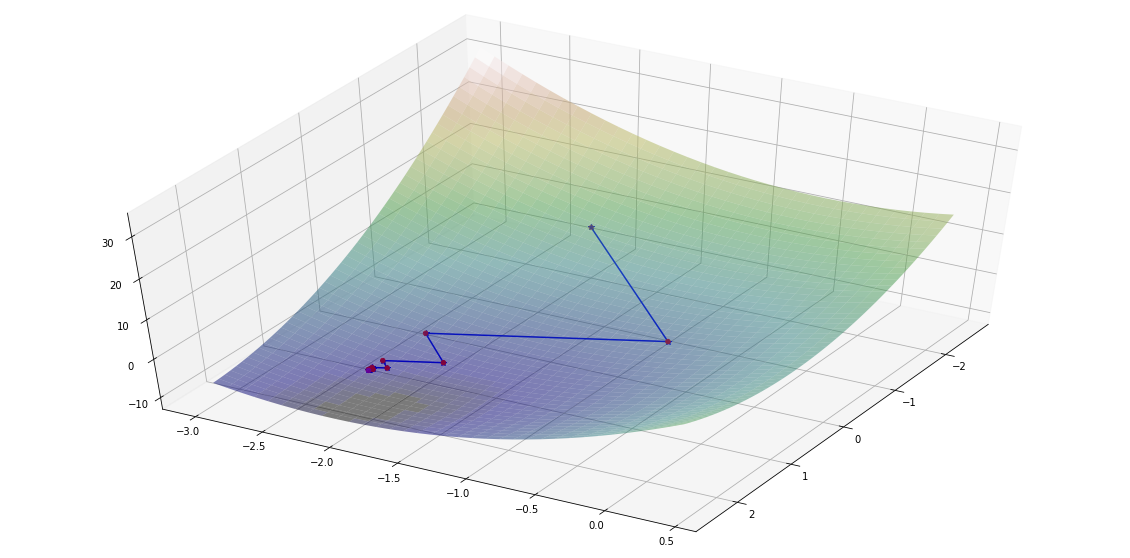

In [51]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
#if using a Jupyter notebook, include:
%matplotlib inline
#plt.rcParams['figure.dpi'] = 400

#plt.rcParams['figure.figsize'] = [30, 15]

x = np.arange(-2.5,2.5,0.1)
y = np.arange(-3,0.5,0.1)
X,Y = np.meshgrid(x,y)
Z = (3/2)*X**2+2*X*Y+3*Y**2-2*X+8*Y

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111, projection='3d')
mycmap = plt.get_cmap('gist_earth')
#ax1.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax1.plot_surface(X, Y, Z,alpha=0.5, cmap=mycmap)
x_p = x_sol 
y_p = y_sol 
plt.plot(x_p,y_p,'b*-')
ax1.scatter(x_p,y_p,color='r')
ax1.scatter(2,-2,color='m')
ax1.view_init(50, 30)
plt.show()

## Aprendizaje automático

Un escenario común en aprendizaje automático es el supervisado, en donde se busca aprender una función que tome como entradas un conjunto de valores y que produzca cierta señal. 

De forma formal tenemos:

Conjunto de entrada 

$$X={x_1,x_2,\ldots,x_N}$$

Y las salidas que debería producir 

$$Y={y_1,y_2,\ldots,y_N}$$

A este conjuntos conjuntos se les conoce como ejemplos de entrenamiento, y por cada $x$ de entrada se produce una $y$. En el caso más sencillo $x$ puede ser de varias dimensiones y $y$ de una sola. $y$ puede ser numérica (regresión) o categorica (clasificación), mientras que $x$ de cualquier tipo o una combinación de estas.

**EL modelo**
En aprendizaje automático se busca establecer una relación entre las variables de entradas y la de salida. La forma de establecer dicha relación es a través de un modelo. El modelo define como se relacionan las variables de entrada para producir la salida. Por ejemplo, en el caso las entradas y salidas fueran uni-dimesional (una dimensión), ambas podrían generar un espacio bi-dimensional que podríamos definir a través del modelo de una línea del tipo: $$y=mx+b$$ (regresión lineal).

Los modelos dependen de parámetros, en este ejemplo $m$ y $b$, que podemos modificar para hacer que el modelo se aproxime de la mejor forma a la salida. A estos dos parámetros los representamos usando la notación $\theta$, de tal forma que buscamos encontrar $f_{\theta} (X) \approx Y$. Es decir que la funcion $f$ con los parámetros $\theta$ de tal forma que para todos los valores $X$ de entrada aproxime a los valores de salida $Y$ correspondientes.

**Función de costo J**

Al modelo se le puede asignar diferentes valores a sus parámetros, algunos de estos harán que $f_{\theta} (X) $ aproximen mejor a $Y$. Para medir que tan bien nuestros parámetros definen la salida podemos se define una función de costo $J(\theta)$ que mide la diferencia entre las salidas originales y las salidas producidas por el modelo. Existen varias opciones para $J$ dos de las más comunes:

Mean square error MSE 
$$ \frac{1}{N} \sum_{i=1}^N( f_{\theta} (x_i)- y_i)^2$$


Mean absolute error MAE 

$$ \frac{1}{N} \sum_{i=1}^N|f_{\theta} (x_i)- y_i |$$

**Gradiente descendente para minimizar J**

En aprendizaje automático se usa el gradiente descendente  para encontrar los parámetros del modelo que mejor definen el conjunto de entrenamiento. La forma de lograr eso es minimizar la función de costo $J$ de la siguiente forma:

$$\min_{\theta} J(\theta)$$

Esto quiere decir, encontrar los parámetros $\theta$ que minimicen la diferencia entre las salidas $Y$ y las producidas por el modelo dependiente de $\theta$. Entre menor la diferencia quiere decir que el modelo $\theta$ aproxima mejor a la salida $Y$. Adaptando esto al gradiente descendente quiere decir que se itera sobre una secuencia de valores de $\theta$ de la siguiente forma:

$$ \hat\theta = \theta - t\nabla J(\theta)$$

En dónde $\hat\theta$ es una nueva posición para los parámetros que se acercan más al mínimo, es decir que hacen que $f_\theta(X)$ aproxime mejor a $Y$ . En esta formulación:

Se escoge $\theta$ y su $f$
Se escoge $J(\theta)$
Se escoge $t$
Se calcula el gradiente $\nabla J(\theta) $

**El algoritmo**

Con todo lo anterior se define el siguiente algoritmo:


Ejemplo: regresión lineal para $y=mx+b$

* $X$ y $Y$ son uni-dimensional y numéricas,
* Se usa el modelo $y=mx+b$ con parámetros $\theta=(m,b)$,
* Como función de costo se usa MSE. Esto produce la siguiente expresión:

$$\hat{\theta} =\theta-k \nabla \frac{1}{N} \sum_{i=1}^N (y_i- {f}_{\theta} (x_i) )^2 $$

Para lo cual se calcula:

$$\nabla \theta = \nabla (m,b) =(m', b') = \left(\frac{\partial }{\partial m} J(\theta), \frac{\partial}{\partial b} J(\theta)\right)$$


**Para el parámetro $m$ tenemos**:

$$ m' = \frac{\partial}{\partial m} \left( \frac{1}{N} \sum ({f}_{\theta} (x_i) - y_i)^2 \right) = \frac{2}{N} \sum\left((f_{\theta} (x_i) - y_i) \frac{\partial}{\partial m} (f_{\theta} (x_i) - y_i) \right) $$

Pero recordemos que:

$$ f_{\theta} = mx+b $$

Y sustituyendo llegamos:

$$ = \frac{2}{N} \sum\left((f_{\theta} (x_i) - y_i) \frac{\partial}{\partial m} (mx_i + b- y_i) \right) = \frac{2}{N} \sum (f_{\theta} (x_i) - y_i) x_i $$



**Para el parámetro $b$ tenemos**:

$$ b' = \frac{\partial}{\partial b} \left( \frac{1}{m} \sum ({f}_{\theta} (x_i) - y_i)^2 \right)  = \frac{2}{N} \sum\left((f_{\theta} (x_i) - y_i) \frac{\partial}{\partial b} (mx_i + b- y_i) \right) = \frac{2}{N} \sum (f_{\theta} (x_i) - y_i) $$

Parámetros a través del gradiente descendente

Con el gradiente $(m',b')$ podemos calcular los siguientes parámetros de $(\hat m, \hat b)$ de la siguiente forma:

$$ \hat m = m - \frac{t}{N} \sum(f_{\theta} (x_i) - y_i) \cdot x_i $$

$$ \hat b = b - \frac{t}{N} \sum(f_{\theta} (x_i) - y_i) $$


## Teoremas
**Theorem**. Let $f:R^n→R$ be continuously differentiable on $R^n$, and let $x_0\in D$.  Let $t∗>0$ be the minimizer of the function $$φ(t) =f(x_0−t∇f(x_0)),\quad  t≥0$$ and let $$x_1=x_0−t∗∇f(x_0).$$  
Then $f(x_1)< f(x_0)$. That is, the Method of Steepest Descent is guaranteed to make at least some progress toward a minimizer $x∗$ during each iteration. 

This theorem can be proven by showing that
$φ′(0)<0$, which guarantees the existence of ̄$t >0$ such that $φ(t)< φ(0)$.

**Theorem** Let $f:R^n→R$ be continuously differentiable on $R^n$, and let $x_k$ and $x_{k+1}$, for $k≥0$, be two consecutive iterates produced by the Method of Steepest Descent. Then the steepest descent directions from $x_k$ and $x_{k+1}$ are orthogonal; that is, $∇f(x_k)·∇f(x_{k+1}) = 0$.

This theorem can be proven by noting that $x_{k+1}$ is obtained by finding a critical point $t∗$ of $ φ(t) =f(x_k−t∇f(x_k))$, and therefore $φ′(t∗) =−∇f(x_{k+1})·f(x_k) = 0$. That is, the Method of Steepest Descent pursues completely independent search directions fromone iteration to the next. However,  in some cases this causes the method to “zig-zag” from the initial iterate $x_0$ to the minimizer $x∗$.
It has been shown that Newton’s Method can fail to converge to a solution if the initial iterate is not chosen wisely.  For certain functions, however, the Method of Steepest Descent can be shown to be much more reliable.

**Theorem** Let $f:R^n→R$ be a coercive function with continuous first partial derivatives on $R^n$. Then, for any initial guess $x_0$, the sequence of iterates produced by the Method of Steepest Descent from $x_0$ contains a subsequence that converges to a critical point of $f$. This result can be proved by applying the Bolzano-Weierstrauss Theorem, which states that any bounded sequence  contains  a convergent subsequence. The sequence ${f(x_k)}∞k=0$ is a decreasing sequence, as  indicated by a previous theorem, and it is a bounded sequence,  because $f(x)$ is continuous and coercive and therefore has a global minimum $f(x∗)$. It follows that the sequence ${x_k}$ is also bounded, for a coercive function cannot be bounded on an unbounded set. By the Bolzano-Weierstrauss Theorem, ${x_k}$ has a convergent subsequence ${x_{k_p}}$, which canbe shown to converge to a critical point of $f(x)$.  Intuitively, as $x_{k+1}=x_k−t∗∇f(x_k)$ for some $t∗>0$, convergence of ${x_{k_p}}$ implies that 

$$0 =  lim_{p→∞}x_{k_{p+1}}−x_{k_p}=−\sum^{k_{p+1}−1}_{i=k_p}t_i^*∇f(x_i),  t_i^*>0,$$

which suggests the convergence of $∇f(x_{k_p})$ to zero. If $f(x)$ is also strictly convex, we obtain the following stronger result about the reliability ofthe Method of Steepest Descent

**Theorem** Let $f:R^n→R$ be a coercive,  strictly  convex  function  with  continuous  first  partial derivatives on $R^n$. Then, for any initial guess $x_0$, the sequence of iterates produced by the Method of Steepest Descent from $x_0$ converges to the unique global minimizer $x∗$ of $f(x)$ on $R^n$. 

This theorem can be proved by noting that if the sequence ${x_k}$ of steepest descent iterates does not converge to $x∗$, then any subsequence that does not converge to $x∗$ must contain a subsequence that converges to a critical point, by the previous theorem, but $f(x)$ has only one critical point, which is $x∗$, which yields a contradiction.